# Chapter5 오차역전파법

- 4장에서 수치 미분을 사용해 기울기 계산을 하였다
- 수치 미분은 구현은 쉽지만 계산이 오래 걸린다는 단점이 있다
- 이번장에서는 가중치 매개변수 기울기를 효율적으로 계산하는 오차역전파법을 볼 것이다 

  => 수식과 계산 그래프를 통한 2가지 이해하는 방법이 존재. 여기서는 그래프로 시작적인 이해를 해보겠다

In [1]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [2]:
import numpy as np

## 5.1 계산 그래프

### 5.1.1 계산 그래프로 풀다

- 계산 그래프를 잘 이해하면 복잡한 계산에서 이해하는데 큰 도움이 된다


문제 1 : 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀다. 이 때 지불금액은? (단, 소비세 10% 부과됨)

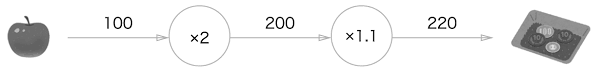

ㄴ 각 노드를 거쳐 계산 결과가 왼쪽에서 오른쪽으로 전해진다

<br/>

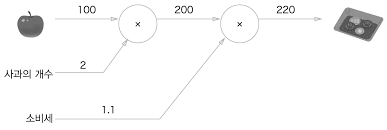

ㄴ 사과의 개수와 소비세를 변수로 취급해 원 밖에 표기함

문제 2 : 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀다. 사과는 1개 100원, 귤은 1개에 150원, 소비세 10%일때 지불금액은?

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FECAfA%2Fbtq4rI9sNJw%2FK4VP8XFJkJbaONionuOWwk%2Fimg.png)

> 계산 그래프를 이용한 문제풀이의 순서

1. 계산 그래프를 구성한다.
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. = 순전파

- 순전파 : 계산그래프의 출발점부터 종착점으로의 전파
- 역전파 : 종착점(오른쪽)에서 출발점(왼쪽)으로의 전파 (미분계산시 중요역할)

### 5.1.2 국소적 계산

- **국소적 계산**을 전파함으로 최종 결과를 얻는다는 점이 계산 그래프의 특징이다
- 국소적 : 자신과 직접 관계된 작은 범위 

  => 국소적 계산 : 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 것


![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbYYf9U%2Fbtq4rdaMMiq%2FSOzYnRR5Ph5vk3J3JSYk31%2Fimg.png)

ㄴ 여러 식품들을 구입하면서 많은 계산을 걸쳐 총금액이 나오지만 결국은 물건의 값과 개수를 곱하는 것이나 계산된 물건의 값을 합하는 것이나 노드끼리의 계산은 더하거나 곱하는, 단순한 계산임을 기억하자

### 5.1.3 왜 계산 그래프로 푸는가??

- 계산 그래프의 이점은?? 사용하는 이유는?? => 국소적 계산
- 복잡한 전체 계산을 단순 계산으로 문제를 단순화한다.
- 중간 계산 결과를 보관할 수 있다
- **역전파를 통해 미분을 효율적으로 계산할 수 있다**

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FctTMTs%2Fbtq4q3MW79v%2FtASA6fBkcLUHpH0e9nqVfK%2Fimg.png)


- 역전파는 순전파의 반대 방향의 굵은 화살표
- 역전파는 국소적 미분을 왼쪽으로 전달한다
- 사과 가격에 대한 지불 금액의 미분값은 2.2
  => 사과 1원이 오르면 최종 금액은 2.2원 오른다
  
  ( = 사과 값이 아주 조금 오르면 최종 금액은 그 아주 작은 값의 2.2배만큼 오른다)

- 중간까지 구한 미분 결과 공유 가능하여 다수 미분 효율적 계산 가능


=> **계산 그래프의 이점은 순전파와 역전파를 활용해 각 변수의 미분을 효율적으로 구할 수 있다는 것이다**

## 5.2 연쇄법칙(Chain Rule)

### 5.2.1 계산 그래프의 역전파

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fpgceg%2Fbtq4p4yS538%2FZMY0o0vYqltqG0eMBhnF9K%2Fimg.png)

ㄴ 계산 그래프의 역전파 : 순방향과 반대로 국소적 미분을 곱한다

> y = f(x)의 계산 역전파

1. 역전파의 계산 절차는 신호 E에 노드의 국소적미분(ay/ax)을 곱한 후 왼쪽 노드로 전달한다

2. 국소적 미분은 순전파 때의 y = f(x) 계산의 미분을 구하는 것 즉, x에 대한 y의 미분을 구한다는 뜻

3. 국소적인 미분을 상류에서 전달된 값에 곱해 앞쪽 노드로 전달하는 것

=> 이것이 역전파의 계산순서, 왜 그런 일이 가능한지는 연쇄 법칙으로 설명가능

### 5.2.2 연쇄법칙이란??

- 연쇄법칙을 이해하려면 먼저 합성 함수부터 알아야 한다.
- 합성함수의 미분에 대해 이해가 필요하다

- z = (x + y)^2  =>  z = t^2  & t = x + y 

  ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FcX497u%2Fbtq4oQgMXUI%2FKCBpSZXHF3iTWkXEUMy240%2Fimg.jpg)

### 5.2.3 연쇄법칙과 계산 그래프

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=leesu52&logNo=90172807867

![임지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fvt0V9%2Fbtq4wv2xPgL%2F9yiFA73c8yRPDf06jNbaSK%2Fimg.png)

z를 t에 대해 미분 -> t를 x에 대해 미분 => z를 x에 대해 미분

## 5.3 역전파

## 5.3.1 덧셈 노드의 역전파

> z = x + y

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FALdF6%2Fbtq4o7bw6t0%2FmKFdTtk0uSkkl9bkt9aosk%2Fimg.png)

ㄴ 왼쪽이 순전파이자 z = x + y식을 표현 / 오른쪽은 역전파. 

ㄴ 역전파 때 상류에서 전해진 미분(aL/az)에 1을 곱해서 하류로 흘린다 = 덧셈 노드의 역전파는 1을 곱하기만 할 뿐 입력 값을 그대로 다음 노드로 보낸다

ㄴ aL/az라 표현한 것은 상류와 하류 중간의 계산임을 표현하기 위함

<br/>

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FQHqxl%2Fbtq4wv9jSuZ%2FmKpR0h8BJCknEpRkDKT600%2Fimg.png)


<br/>

ex) 10 + 5 = 15 라는 계산이 있고 상류에서 1.3이 흘러오는걸 계산 그래프로 표현한다 

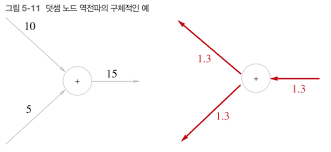


### 5.3.2 곱셈 노드의 역전파

> z = xy

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbPDIj3%2Fbtq4qET11St%2FaPTgX1y6Dw4Wpz8qiJcm1K%2Fimg.png)

ㄴ 왼쪽이 순전파 / 오른쪽이 역전파

ㄴ 곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 보낸다

ㄴ 왜 '서로 바꾼 값'이 곱해질까??

  1. 상류에서 L은 z로 이루어진 식이 있을것이고, 거기에 대한 미분은 aL/az로 내려온다

   z = xy를 각각 x,y에 대해 편미분하면 az/ax = y, az/ay = x

   L은 z로 이루어진 식이고, z는 x,y로 이루어진 식이기때문에 L은 x,y로 이루어진 합성함수이다. 
   
   그러니 L의 x,y에 대한 각각의 편미분이 존재. 우리가 궁극적으로 원하는 것은 출력의 입력값에 대한 각각의 미분을 구하려는 것이니 여기서 구하고자 하는 것은 L의 x,y에 대한 미분이라 할수있다 => 왜 미분을 구하냐고?? 가중치 등의 매개변수를 기울기를 갱신하면서 최적점을 찾으니까.

  L의 x에 대한 미분식은 **aL/ax = (aL/az) \* (az/ax) = y * (aL/az)** 이렇게 표현될 수 있다
   
 y * (aL/az)에서 y는 단순히 반대노드의 입력값이 아닌 az/ax, 미분값이 곱해진것이다

<br/>

ex) 10 x 5 = 50 이라는 계산이 있고, 역전파 상류에서 1.3 값이 흘러온다



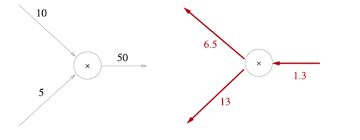

ㄴ 오른쪽에서 들어오는 1.3이 아래로는 10이 곱해져서 13이 되서 내려가고 / 위로는 5가 곱해져서 올라간다

 => 상류의 값에 순전파 때의 입력신호들을 '서로 바꾼 값'을 곱해서 하류로 보낸다

### 5.3.3 사과 쇼핑의 예

- 이 문제에서 사과의 가격, 개수, 소비세라는 세 변수 각각이 최종 금액에 어떻게 영향을 주느냐를 풀고 싶다

  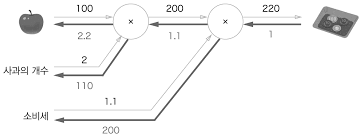

  ㄴ 사과가격에 대한 지불 금액의 미분 등 3가지 변수에 대한 지불금액의 미분을 구한다
  
  ㄴ 사과가격 미분 2.2 / 사과 개수 미분 110 / 소비세 미분 200 만큼 최종금액에 영향

  ㄴ 사과 가격과 소비세의 단위가 다르므로 주의해야함

## 5.4 단순한 게층 구현하기

- 계층 : 신경망의 기능 단위

- 계산 그래프의 곱셉 노드 : MulLayer

- 계산 그래프의 덧셈 노드 : AddLayer 

### 5.4.1 곱셈 계층

- forward() : 순전파 / backward() : 역전파

In [3]:
class MulLayer:
    def __init__(self): # 인스턴스 변수인 x, y 초기화 
        self.x = None
        self.y = None

    def forward(self, x, y): # x, y를 인수로 받고 / 두 값을 곱해서 반환 
        self.x = x
        self.y = y
        out = x * y

        return out
    
    def backward(self, dout): # 상류에서 넘어온 미분(dout)에 순전파 때의 값을 서로 바꿔 곱하고 하류로 흘린다
        dx = dout * self.y # x와 y를 바꾼다
        dy = dout * self.x

        return dx, dy

In [4]:
apple = 100
apple_num = 2
tax = 1.1 

mul_apple_layer = MulLayer() # 아아 2계층으로 보고 각각 지정해주면 되는구나
mul_tax_layer = MulLayer() 

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
price

220.00000000000003

In [5]:
# 역전파 
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

dapple, dapple_num, dtax

(2.2, 110.00000000000001, 200)

- backward 호출 순서는 forward와 반대. 
- backward가 받는 인수는 **순전파의 출력에 대한 미분**임을 주의

=> 위의 사과 쇼핑 예제를 이 클래스를 통해 구현하였다

### 5.4.2 덧셈 계층

In [6]:
class AddLayer:
    def __init__(self): # 덧셈 계층에서는 초기화가 필요없으므로 init에서 pass
        pass

    def forward(self, x, y): # 덧셈 계층이니까 두 인수를 더해서 반환 
        out = x + y
        return out

    def backward(self, dout): # 상류에서 내려온 미분을 그대로 하류로 흘림
        dx = dout * 1
        dy = dout * 1
        return dx, dy

- 직접 구현해보기

  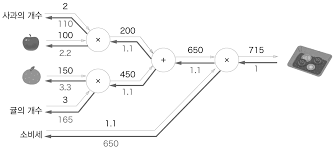

> 책 안보고 사과2개와 귤3개 구입 과정을 구현해보자

In [7]:
# 사과 가격과 개수
apple_price = 100
apple_num = 2

# 귤 가격과 개수
manda_price = 150
manda_num = 3

# 소비세 
tax = 1.1

#####################################################################

# 곱셈 계층 - 사과랑 귤 두개 만들어야.
apple_mul_layer = MulLayer() 
manda_mul_layer = MulLayer()

# 덧셈 계층
add_layer = AddLayer() # 사과와 귤 덧셈 계층

# 곱셈 계층
mul_tax_layer = MulLayer() # 사과와 귤 합한 값과 소비세의 곱셈 계층


######################################################################

# 순전파
apple_total_price = apple_mul_layer.forward(apple_price, apple_num)
manda_total_price = manda_mul_layer.forward(manda_price, manda_num)
fruit_total_price = add_layer.forward(apple_total_price, manda_total_price)
total_price = mul_tax_layer.forward(fruit_total_price, tax)

apple_total_price, manda_total_price, fruit_total_price, total_price # 순전파까지는 ok


# 역전파
dtotal_price = 1 # 상류에서 내려오는 미분값
dfruit_total_price, dtax = mul_tax_layer.backward(dtotal_price)
dapple_total_price, dmanda_total_price = add_layer.backward(dfruit_total_price) # 여기까지는 ok

dapple_price, dapple_num = apple_mul_layer.backward(dapple_total_price)
dmanda_price, dmanda_num = manda_mul_layer.backward(dmanda_total_price) # 역전파도 ok

In [8]:
dfruit_total_price, dtax

(1.1, 650)

In [9]:
dapple_total_price, dmanda_total_price

(1.1, 1.1)

In [10]:
dapple_price, dapple_num

(2.2, 110.00000000000001)

In [11]:
dmanda_price, dmanda_num

(3.3000000000000003, 165.0)

In [12]:
%cd /content/deep-learning-from-scratch/ch05

/content/deep-learning-from-scratch/ch05


In [13]:
# 책 코드

# coding: utf-8
from layer_naive import *

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)


price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## 5.5 활성화 함수 계층 구현하기

- ReLU, Sigmoid 계층 구현

### 5.5.1 ReLU 계층


> ReLU 수식



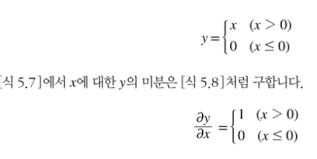


- 순전파에서 입력 x가 0보다 크면 역전파는 상류의 값을 그대로 하류로 보낸다
- 순전파에서 입력 x가 0이하면 역전파는 하류로 신호를 보내지 않는다(0을 보낸다)


![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FPgp4U%2Fbtq4pAEy9de%2FDab7vl3d4bSukIs0JMaCZ0%2Fimg.png)


In [14]:
class Relu:
    def __init__(self):
        self.mask = None 
        # mask : True/False로 구성된 넘파이 배열, 순전파의 입력 x의 원소 값이 0이하인 인덱스는 True, 그 외(0보다 큰 원소)는 False 유지
        # 근데 왜 0이하일 때 True를 줬을까??

    def forward(self, x):
        self.mask = (x <= 0 ) 
        out = x.copy()
        out[self.mask] = 0 # True인 곳을 0으로 바꿈.

    def backward(self, dout):
        dout[self.mask] = 0 # 순전파 때 만들어둔 mask를 써서 mask의 원소가 True인 곳에는 상류에서 전파된 dout를 0으로 설정
        dx = dout

        return dx

In [15]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
x

array([[ 1. , -0.5],
       [-2. ,  3. ]])

In [16]:
mask = (x <= 0) # 넘파이 배열에 조건을 검. x가 0이하면 True / 그 외엔 False
mask

array([[False,  True],
       [ True, False]])

In [17]:
out = x.copy()
out[mask] = 1000 # True인 부분에 값을 덮어씌움. 이건 무슨 방법을 사용한걸까???
out

array([[   1., 1000.],
       [1000.,    3.]])

### 5.5.2 Sigmoid 계층



![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2F3caV1%2Fbtq4sqVfPb3%2FHrKV8NM9qIKlBzwc2WVatk%2Fimg.png)


![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FnDoKa%2Fbtq4sqOu8os%2F9TUkKNzReZqvZUZnDGI3o0%2Fimg.png)



- exp 노드 : y = exp(x)  
- '/' 노드 : y = 1/x 


- [시그모이드 역전파 계산 설명](https://blog.naver.com/PostView.nhn?blogId=riverrun17&logNo=221901319498)


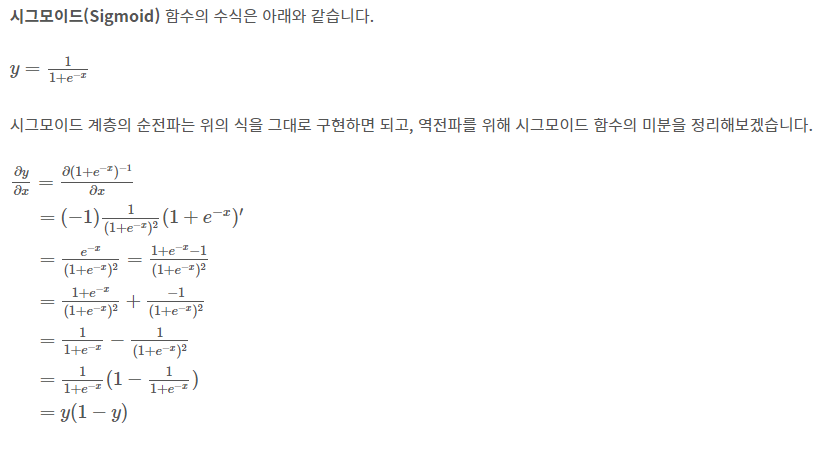

- 이렇게 수식으로 미분되는 과정은 이해가 잘 되는데... 왜 책의 과정은 이해가 잘 안될까...

- 아 결국 코드보면 수식의 결과값 y(1-y)를 적용시킨다. 미분을 저렇게 해서 이렇게 결과가 나온다고 알면 충분할듯?

In [18]:
class Sigmoid:
    def __init__(self):
        self.oust = None

    def forward(self, x):
        out = 1 / ( 1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.oust

        return dx


## 5.6 Affine / Softmax 계층 구현하기

- 어렵고 이해안되는 부분이 많았다

### 5.6.1 Affine 계층 

- 신경망의 순전파 때 수행하는 행렬의 곱을 기하학에서 **어파인 변환**이라 한다

 => 그래서 이 책에서는 어파인 변환을 하는 처리를 'Affine 계층'이라 부르겠다
 
  < Affine 계층의 계산 그래프 > 

 ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fwlb0D%2Fbtq4qBb4IIe%2FS7VAUhXyK6je2wyERYCLhK%2Fimg.png)

  ㄴ 계산 그래프에서 각 변수의 형상에 주의하자

  ㄴ **X와 aL/aX, W와 aL/aW가 같은 형상이라는 것**을 기억할 것.

### 5.6.2 배치용 Affine 계층

- 데이터 N개를 묶어 순전파하는 경우

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbtPjyn%2Fbtq4qBb4Jdp%2F3cd50iqZvjYwDWcUyzYzRK%2Fimg.png)



- 위의 사진과 다른 부분은 X의 형상이 (N,2)로 변한 것
- 편향 덧셈 주의 : 순전파 때의 편향 덧셈은 X*W에 대한 편향이 각 데이터에 더해진다

  ex) N = 2일때, 편향은 그 두 데이터 각각의 계산결과에 더해짐



- [딥러닝 역전파 수식 행렬의 전치(Transpose) 기준?](http://taewan.kim/post/backpropagation_matrix_transpose/)

In [19]:
X_dot_W = np.array([[0,0,0], [10,10,10]])
B = np.array([1,2,3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [20]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

- 순전파의 편향 덧셈은 각각의 데이터에 더해진다. 그래서 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다

In [21]:
dY = np.array([[1,2,3], [4,5,6]])
dB = np.sum(dY, axis=0)
dY, dB

(array([[1, 2, 3],
        [4, 5, 6]]), array([5, 7, 9]))

- 데이터가 2개라고 가정하고 편향의 역전파는 그 두 데이터에 대한 미분을 데이터마다 더해서 구한다.

- 그래서 np.sum에서 0번째 축에 대해서 총합을 구하는 것이다

In [22]:
class Affine: # ???? 설명을 봐도 모르겠다 
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out 

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self, x.T, dout)
        self.db = np.sum(dout, axis=0) # 왜 트랜스포즈 해주는건 알겠는데 그냥 해준다고 알고 넘어가면 되나??

        return dx

### 5.6.3 Softmax-with-Loss 계층


![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fms0CB%2Fbtq4p7WrR6L%2FujBfQoUf2TJ6XTgAMfNGD1%2Fimg.png)

- softmax 계층은 입력 값을 정규화(출력의 합이 1이 되도록 변형)하여 출력한다
- softmax 계층과 손실함수 교차 엔트로피 포함하여 softmax-with-loss계층 구현

<br/>


![ㅇ](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fcqwx2w%2Fbtq4o9HpZvK%2Fs4GvXhEJHAU6H9nkVWzSmK%2Fimg.png)

- ...? 뭔소리지??

- 그림에서 주목할 점은 역전파의 결과(y1-t1, y2-t2, y3-t3)이다
- (y1, y2, y3)는 소프트맥스 계층의 출력이고
- (t1, t2, t3)는 정답 레이블이므로
- (y1-t1, y2-t2, y3-t3) 이 값들은 소프트맥스 계층의 출력과 정답 레이블의 차분

  => **역전파를 통해 정답과 예측 값의 오차가 앞 계층에 전해지는 것이다** <= 이 부분 중요하니 기억할것

In [23]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x) # 3.5.2 소프트맥스 함수
        self.loss = cross_entropy_error(self.y, self.t) # 4.2.4 배치용 교차 엔트로피 오차 함수
        return self.loss 

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = ( self.y - self.t ) / batch_size

        return dx

## 5.7 오차역전파법 구현하기

### 5.7.1 신경망 학습의 전체 그림

1. 미니배치
2. 기울기 산출 - 수치 미분 대신 오차역전파법 사용
3. 매개변수 갱신
4. 1~3단계 반복

### 5.7.2 오차역전파법을 적용한 신경망 구현하기

- 2층 신경망을 TwoLayerNet 클래스로 구현

In [24]:
%cd /content/deep-learning-from-scratch

/content/deep-learning-from-scratch


In [25]:
import sys, os
sys.path.append('/deep-learning-from-scratch')
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
 
 
class TwoLayerNet:
 
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)
 
        # 계층 생성
        # OrderedDict = 순서가 있는 딕셔너리, 순서 기억
        # 순전파 때는 계층을 추가한 순서대로 / 역전파 때는 계층 반대 순서로 호출
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
 
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x: 입력데이터, t : 정답레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x: 입력데이터, t : 정답레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x,t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

- 특히 **신경망의 계층을 OrderedDict에 보관하는 점**이 중요하다!!
- OrderedDict : 순서가 있는 딕셔너리. 딕셔너리에 추가한 순서를 기억한다

  => 순전파 때 추가한 순서대로 각 계층의 forward를 호출하기만 하면 처리됨 / 역전파 때는 계층을 반대 순서로 호출하기만 하면됨 - 아 그래서 reverse

- 신경망의 구성 요소를 계층으로 모듈화해서 구현한 효과는 크다! - 깊은 신경망을 만들고 싶다면 필요한 만큼 추가해주면 되기에

### 5.7.3 오차역전파법으로 구한 기울기 검증하기 
> 기울기 구하는 방법 2가지
  
  1. 수치 미분으로 구하는 방법

     ㄴ 구현은 쉬우나 느리다. 너무 느림.

  2. 해석적으로 수식을 풀어서 구하는 방법 
     
     ㄴ 오차역전파법을 이용해 효율적으로 계산

  => 그럼 수치 미분은 더이상 필요가 없나??? 그건아님

  수치 미분은 구현이 쉽다. 반면 오차역전파는 구현하기 복잡하다

  그래서 수치 미분, 오차역전파법의 결과를 비교해서 오차역전파법이 제대로 구현되었는지를 검증한다


> 이렇게 두 방식으로 구한 기울기가 일치하는지를 확인하는 작업을 **기울기 확인**이라 한다

In [27]:
%cd /content/deep-learning-from-scratch/ch05

/content/deep-learning-from-scratch/ch05


In [29]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist 
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

network = TwoLayerNet(input_size= 784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치 차이의 절댓값을 구한 후, 그 절댓값의 평균을 낸다
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ':' + str(diff))

W1:3.1591822986563804e-06
b1:2.7902035939231647e-05
W2:5.725646692366788e-09
b2:1.399319017353351e-07


- 결과를 통해 수치 미분과 오차역전파법으로 구한 기울기의 차이가 매우 작음을 알 수 있다
- 컴퓨터 계산 정밀도의 유한성 때문에 오차가 0이 나오진 않는다.
- 올바르게 구현했다면 0에 아주 가까운 값이 나온다

### 5.7.4 오차역전파법을 사용한 학습 구현하기

In [30]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist 
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)

network = TwoLayerNet(input_size= 784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 오차역전파법으로 기울기를 구한다
    grad = network.gradient(x_batch, t_batch)

    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.15135 0.1492
0.9064333333333333 0.9093
0.9242166666666667 0.9242
0.9380166666666667 0.9374
0.9445833333333333 0.9443
0.9535333333333333 0.9527
0.9571166666666666 0.9556
0.9623666666666667 0.9575
0.9643166666666667 0.9623
0.96835 0.9624
0.9711333333333333 0.9647
0.9732333333333333 0.9679
0.97455 0.9675
0.9762666666666666 0.9688
0.9782166666666666 0.9692
0.9784833333333334 0.9687
0.9803666666666667 0.9724


## 5.8 정리

- 계산 그래프를 이용하면 계산 과정을 시각적으로 파악할 수 있다
- 계산 그래프의 노드는 국소적 계산으로 구성된다. 국소적 계산을 조합해 전체 계산을 구성한다
- 계산 그래프의 순전파는 통상의 계산을 수행한다. 역전파는 각 노드의 미분을 구할 수 있다
- 신경망의 구성요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다 - 오차역전파법
- 수치 미분과 오차역전파법의 결과를 비교하여 오차역전파법의 구현에 잘못이 없는지 확인할 수 있다 - 기울기 확인